Alright,  welcome to Chapter 2! This is where the real work begins.

Think of Chapter 1 as our "tool collection" phase. We learned about Machine Learning, what it is, and what kinds of tools are in the toolbox (like regression, classification, etc.).

Now, in this chapter, we're going to build our first complete project. We're going to see how all those tools and concepts fit together from the absolute start to the very end.

**The Project: Our First End-to-End System**
To make this practical, we're going to "role-play." We are all now newly hired data scientists at a real estate company. Our job is to build a model that can predict housing prices.

Now, the goal here isn't to become real estate experts. The company is just a story. The *real* lesson is to learn the **process**. These 8 steps are the blueprint for *any* machine learning project, whether we're predicting house prices, stock prices, or cat vs. dog images.

Let's look at this blueprint. This is our "road map" for the entire chapter:

1. **Look at the big picture:** This is where we ask "Why?" Why are we doing this? Who will use it? How will our model's predictions be used?

2. **Get the data:** We can't do anything without data. We'll find it and load it.

3. **Explore and visualize:** We'll act like detectives, plotting and graphing the data to find patterns, quirks, and outliers.

4. **Prepare the data:** This is the "clean-up" phase. Real-world data is messy. We'll fix missing values and reformat features so the algorithms can understand them.

5. **Select a model and train it:** This is the "fun" part. We'll pick a few promising algorithms (like Linear Regression) and feed them our clean data.

6. **Fine-tune your model:** Our first model is never our best. We'll use techniques like cross-validation (which we talked about in Chapter 1) to tweak our model and squeeze out the best possible performance.

7. **Present your solution:** We'll prepare a report for our "boss" to explain what we found, what our model can (and can't) do, and why it's useful.

8. **Launch, monitor, and maintain:** This is the *real-world* part. We'll talk about how to actually deploy our model so people can use it, and then how to watch it to make sure it stays accurate over time.

**Working with Real Data**

For this chapter, we'll be using the California Housing Prices dataset. It's old (from the 1990 census!), but it's a *classic* dataset for learning regression. It's perfect for us because it has a good mix of numbers (like `median_income`) and categories (like `ocean_proximity`), which will let us practice all the clean-up steps.

---
# **#1 Look at the Big Picture**
---


Alright, let's focus up. This section is **Step 1: Look at the Big Picture**, and it's arguably the *most important* step in our entire 8-step project.

If we just dive in and start coding, we're like builders starting on a house without a blueprint. We'll build *something*, but it probably won't be what the client wanted. "Framing the Problem" is how we draw the blueprint.

Let's break down this text.

---
## **Frame the problem**

### **1. What's Our Real Business Goal?**
Our first task is to ask our boss, "Why are we building this? What's the *business objective?*"

Building a model is never the end goal. The model is a tool to accomplish something.

**Our Boss's Answer:**

- Our model's prediction (the median house price) will be **fed into another machine learning system.**

- This "downstream" system will use our prediction to decide **whether it's worth investing in that area.**

- **Why this matters:** This tells us our model's accuracy is critical. If we're wrong, the company will make bad investments and lose money. We're not just building a fun demo; we're building a core component of a revenue-driving system.

---

### **2. What's the Current Solution? (Our "Baseline")**
Our next question is, "How are we solving this problem right now?" This gives us a **baseline performance** we have to beat.

**Our Boss's Answer:**

- Currently, a team of **experts estimates prices manually** using "complex rules."

- **The problems**: It's **slow**, **costly**, and **inaccurate**.

- **The key number:** When they check their work, their estimates are often **off by more than 30%!**

This is fantastic news for us. We now have our target! Our machine learning model must have an error rate that is *significantly better* than 30%. If we build a model that's only 29% accurate, it's not good enough to justify replacing the expensive human experts.

---

### **3. Understanding Our "Pipeline"**
There is this key concept: a **Data Pipeline**.

Think of it like an assembly line in a factory.

- **Component 1** gathers the data.

- **Component 2** cleans the data.

- **Component 3** (This is US!) takes the clean data and predicts the housing price.

- **Component 4** (the "downstream" system) takes our price and decides "Invest" or "Don't Invest."

Each component is separate. Our team can just focus on Component 3. This is good because it's organized, but it's also a risk: if Component 1 breaks and starts feeding us "stale" (old) data, our model's predictions will slowly get worse, and we might not notice right away.

Ok!! so we will look about this problem in the later cells of this notebook...

---

### **4. How Do We Classify Our ML Task?**
This is the technical part of "Framing the Problem." We need to put our project into the right boxes. This tells us what kind of algorithms and tools we're going to use.

The just pause and answer this ourselves. Let's do it together.

**1. Supervised, Unsupervised, or Reinforcement?**

- **Answer: Supervised.**

- **Why:** The dataset we're using (the 1990 census data) comes with the "answers." For each district, we don't just have the population and income; we also have the `median_housing_price`. Because we have these labels (the answers), our model can be "supervised" as it learns.

**2. Classification or Regression?**

- **Answer: Regression.**

- **Why:** We are predicting a value (a number), not a *category*. We're not trying to classify a district as "Expensive" or "Cheap" (that would be classification). We're trying to predict the exact price, like $345,200.

**3. Univariate or Multivariate Regression?**

- This one is a bit tricky, so let's clarify:

    - It is a **multiple regression** problem because we use *multiple* features (population, median income, etc.) to make our prediction.

    - It is a **univariate regression** problem because we are only predicting one value (the `median_housing_price`). If we were trying to predict two values (e.g., price and crime rate), it would be multivariate.

**4. Batch or Online Learning?**

- **Answer: Batch Learning.**

- **Why:** We have a single, fixed dataset (the census data). We can "batch" train our model all at *once* on this data. We don't have a continuous flow of new data streaming in that requires our model to adapt every second (that would be *online learning*). The data is small enough to fit in our computer's memory, so "plain batch learning" is perfect.

---

**Our Final Blueprint (Summary)**
So, after Step 1, we know exactly what we're doing.

We are building a **supervised, univariate regression model** using a **batch learning** approach. Our goal is to predict the `median_housing_price` with an error rate **significantly lower than 30%**, so that our model can be a reliable component in the company's investment **pipeline**.

We've just finished "Framing the Problem." We know what we're building (a regression model) and why (to feed an investment pipeline).

Now, before we can even *think* about training a model, we need to decide how we're going to **keep score**. How will we know if our model is any good? That brings us to these next two crucial, but quick, steps.

---

### **1. Select a Performance Measure**
This is our "scorecard." When we train our model, we need a single number that tells us "How wrong is it?" For a regression task (where we predict a value), our most common scorecard is the **RMSE**.

#### **What is Root Mean Square Error (RMSE)?**
Let's look at Equation. It looks scary, but it's just a simple process.

$$\text{RMSE}(\mathbf{X}, h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left( h(\mathbf{x}^{(i)}) - y^{(i)} \right)^2}$$
 
Let's break that down from the inside out:

1. `h(x(i)) - y(i)`: This is the error for a *single* house. We take our model's prediction (`h(x(i))`, or `ŷ`) and subtract the actual price (`y(i)`). This gives us the error (e.g., we predicted \$158,400, the actual was \$156,400, so the error is +\$2,000).

2. `(...)^2`: We **square** that error. The error of +$2,000 becomes 4,000,000. Why do we do this? Two reasons:

    - It makes all errors positive (so `-2000` also becomes `4,000,000`).

    - It **punishes large errors way more** than small errors. A small \$10 error becomes 100, but a big \$10,000 error becomes 100,000,000!

3. `1/m * Σ(...)`: This is just "find the average." We **Sum** (`Σ`) up all those squared errors for *all* the houses, then divide by `m` (the number of houses) to get the **Mean** (the "M" in RMSE).

4. `sqrt(...)`: Finally, we take the **Root** (the "R" in RMSE) of that average. This is just to get the number back into a sensible unit. We were working with "squared dollars," and the square root brings us back to regular "dollars."

So, an RMSE of \$41,000 means our model's predictions are, on average, roughly \$41,000 off from the actual price.

#### **A Quick Lesson in Our New "Language" (The Notations)**
We need to learn the "alphabet" of machine learning.

- `m`: The number of *instances* (rows) in our dataset (e.g., 2,000 districts).

- `y(i)`: A *label* (the answer). This is a single number, like $156,400.

- `x(i)`: A *feature vector*. This is a list of all the features for a single instance (e.g., `[-118.29, 33.91, 1416, 38372]`).

- `X`: The *matrix*. This is the whole spreadsheet of features for *all* instances.

- `h`: Our *hypothesis* (our model). It's a function that takes an `x(i)` and spits out a prediction.

- `ŷ(i)` (pronounced "y-hat"): Our model's *prediction* for one instance. `ŷ(i) = h(x(i))`.

#### **What's the Alternative? MAE**
Sometimes, we don't *want* to punish outliers that much. If our dataset has a lot of weird, "outlier" districts, we might use the **Mean Absolute Error (MAE)** instead.

$$\text{RMSE}(\mathbf{X}, h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left( h(\mathbf{x}^{(i)}) - y^{(i)} \right)^2}$$

This is simpler. It just takes the *absolute value* of the error (so `+2000` is 2000, and `-2000` is also 2000). It doesn't square anything. This means it's much more forgiving of large, rare errors.

- **RMSE (**`ℓ2` **norm):** Sensitive to outliers. This is the "straight-line" or Euclidean distance. We should use this when outliers are rare.

- **MAE (** `ℓ1` **norm):** Robust to outliers. This is the "Manhattan" or "city block" distance.

For our project, **RMSE is the default and a good starting point.**

---

### **2. Check the Assumptions**
This is our final, *crucial*, "measure twice, cut once" step before we write a single line of code. We need to stop and ask, "Are we *sure* we're solving the right problem?"

We've made a **huge assumption**.

- **Our Assumption:** The "downstream" investment system needs our exact price prediction (e.g., "\$156,400"). This is why we chose a **regression** model.

- **The Danger:** What if that's wrong? What if that *other* team's system just takes our price and puts it into categories (like "Cheap", "Medium", "Expensive")?

- **The Consequence:** If that's true, we don't need to be perfectly accurate. We just need to get the *category* right. We should be building a **classification** model, not a regression model!

If we don't check this now, we could spend *months* building a beautiful regression model, only to find out it's not what the other team needed.

So, what do we do? We get up from our desk, walk over to the downstream team, and *ask* them.

**The good news:** The book says we did this, and they confirmed they *do* need the actual price. Our assumption was correct.

We're all set. The lights are green. We've framed the problem, chosen our scorecard (RMSE), and verified our assumptions. *Now*, we can start coding.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import tarfile
import urllib.request

In [2]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()    

In [3]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [4]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
import matplotlib.pyplot as plt

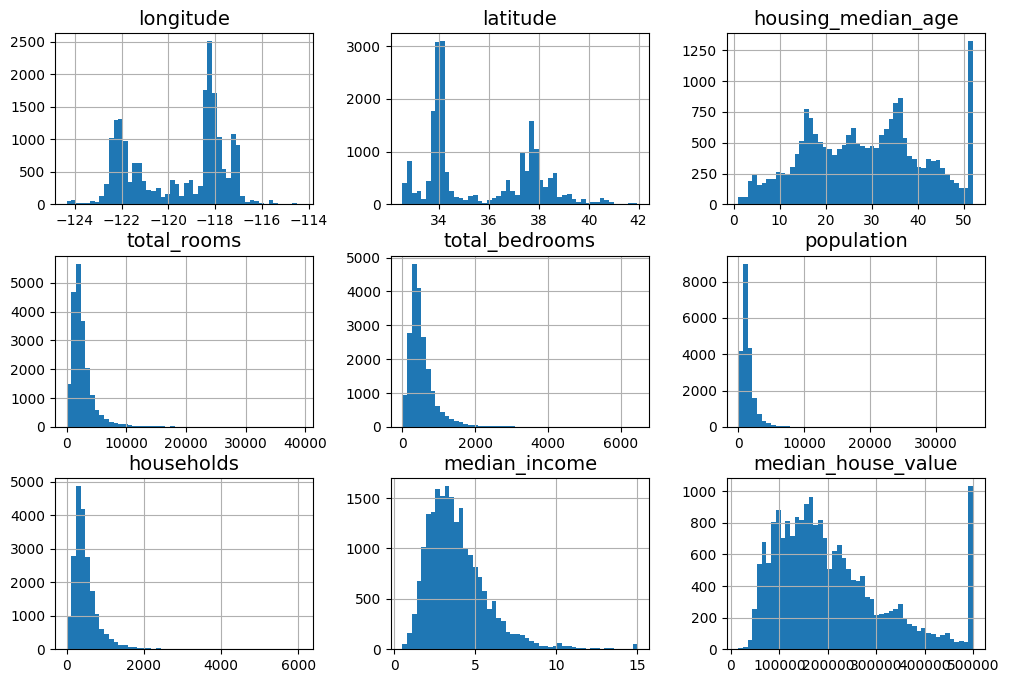

In [8]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing['median_house_value'].value_counts()

median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
476300.0      1
427200.0      1
440000.0      1
489000.0      1
365300.0      1
Name: count, Length: 3842, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [12]:
print(f"train_set: {len(train_set)}, test_set: {len(test_set)}")

train_set: 16512, test_set: 4128


In [13]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0, 1.5, 3, 4.5, 6, np.inf], 
                               labels=[1, 2, 3, 4, 5])

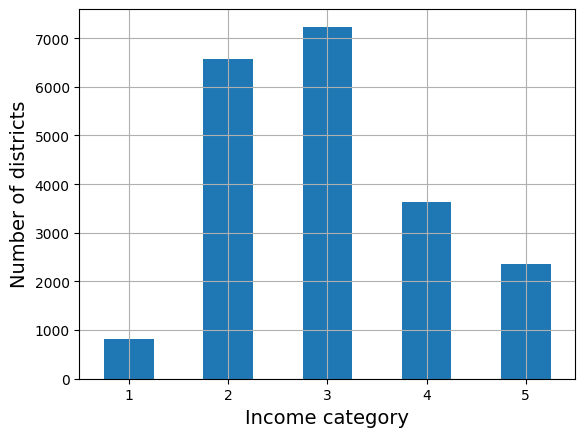

In [14]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [16]:
strat_train_set, strat_test_set = strat_splits[0]

In [17]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing['income_cat'], random_state=42)

In [18]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [20]:
housing = strat_train_set.copy()

In [21]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN


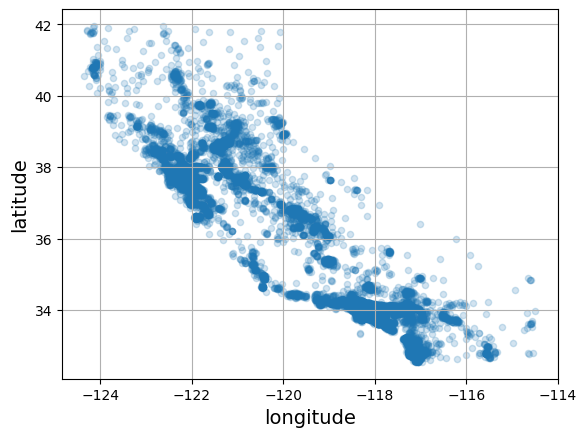

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

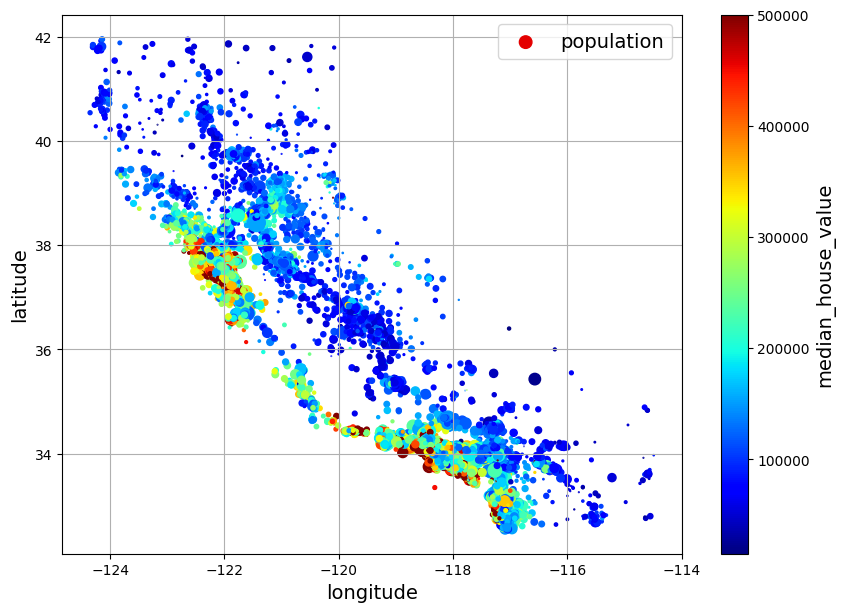

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [24]:
corr_matrix = housing.corr(numeric_only=True)

In [25]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [26]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

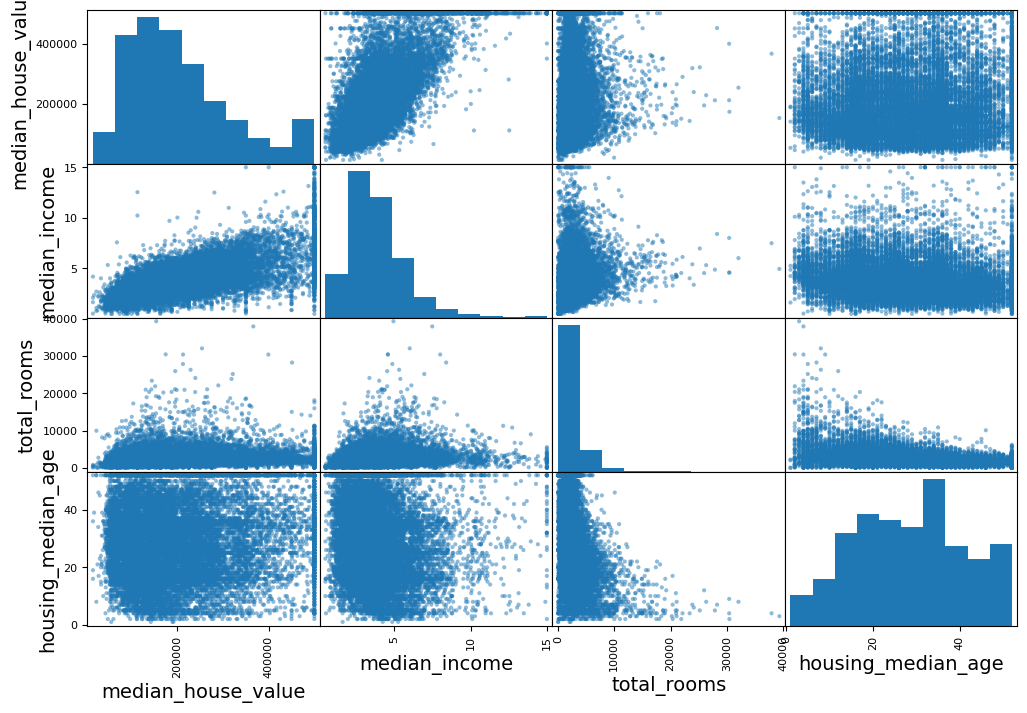

In [27]:
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

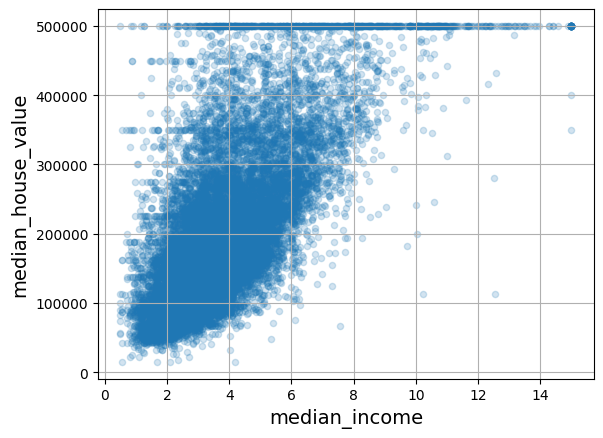

In [28]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2, grid=True)
plt.show()

In [29]:
housing["room_per_house"] = housing["total_rooms"]/housing["households"]
housing["bedroom_ratio"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"] = housing["population"]/housing["households"]

In [30]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
room_per_house        0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedroom_ratio        -0.256397
Name: median_house_value, dtype: float64

In [31]:
housing = strat_test_set.drop("median_house_value", axis=1)
housing_labels = strat_test_set["median_house_value"].copy()

In [32]:
# housing.dropna(subset=["total_bedrooms"], inplace=True) # option 1

# housing.drop("total_bedrooms", axis=1) # option 2

# median = housing["total_bedrooms"].median() # option 3
# housing["total_bedrooms"].fillna(median, inplace=True)

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [34]:
housing_num = housing.select_dtypes(include=[np.number]) 
'''
since we have a feature named `ocean_proximity` and 
it is non-numeric so that we need to drop this
'''

'\nsince we have a feature named `ocean_proximity` and \nit is non-numeric so that we need to drop this\n'

In [35]:
imputer.fit(housing_num) # this is the learning step

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [36]:
imputer.statistics_ # we can take a look at the median that it learns for each feature

array([-118.46  ,   34.23  ,   29.    , 2137.5   ,  438.    , 1163.    ,
        412.5   ,    3.5269])

In [37]:
housing_num.median().values

array([-118.46  ,   34.23  ,   29.    , 2137.5   ,  438.    , 1163.    ,
        412.5   ,    3.5269])

In [38]:
X = imputer.transform(housing_num)
X

array([[-121.95  ,   37.11  ,   21.    , ...,  913.    ,  341.    ,
           7.736 ],
       [-118.01  ,   33.89  ,   36.    , ...,  804.    ,  272.    ,
           4.6354],
       [-118.18  ,   33.74  ,   30.    , ..., 2136.    , 1503.    ,
           4.0968],
       ...,
       [-123.01  ,   38.67  ,   33.    , ...,  394.    ,  132.    ,
           4.6875],
       [-122.03  ,   37.6   ,   24.    , ..., 1488.    ,  389.    ,
           4.5721],
       [-117.12  ,   32.74  ,   52.    , ...,  877.    ,  424.    ,
           3.79  ]], shape=(4128, 8))

In [39]:
# Restore column names and index after Scikit-Learn transformation
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [40]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
3905,<1H OCEAN
16821,<1H OCEAN
2900,NEAR OCEAN
7193,NEAR OCEAN
13928,NEAR BAY
6523,<1H OCEAN
33,NEAR BAY
15996,<1H OCEAN


In [41]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoder = ordinal_encoder.fit_transform(housing_cat)

In [42]:
housing_cat_encoder[:8]

array([[0.],
       [0.],
       [4.],
       [4.],
       [3.],
       [0.],
       [3.],
       [0.]])

In [43]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [44]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1Hot = cat_encoder.fit_transform(housing_cat)

In [45]:
housing_cat_1Hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], shape=(4128, 5))

In [46]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [47]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [48]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

***
## Feature scaling and Transformation
***

### Why Do We Even Need to Scale?
Let's start with the "why." Imagine you're building a model to predict house prices. You have two features (or "attributes"):

1. **Number of Rooms:** Ranges from 6 to 39,320 (as in the text).

2. **Median Income:** Ranges from 0 to 15.

Most machine learning algorithms are, at their core, based on math. They look at these numbers and see that "Number of Rooms" has huge values, while "Median Income" has tiny values.

Without any scaling, the model will naturally assume that the "Number of Rooms" is thousands of times more important than "Median Income," simply because its numbers are bigger. It will be heavily biased toward that one feature and will practically ignore the median income data.

This is like trying to compare 10,000 meters and 10 kilometers. We know they're the same, but an algorithm just sees 10,000 and 10 and thinks the first one is massive.

**The Goal:** Feature scaling is all about putting all your numerical features onto a level playing field so the algorithm can judge them by their actual contribution to the prediction, not just their arbitrary scale.

---
### **The Two Main Scaling Methods**


### 1. Min-Max Scaling (also called Normalization)
This is the most straightforward method. It takes every value in a feature and "squeezes" or "stretches" it so that all the values end up in a specific range, usually 0 to 1.
**The Analogy:** Think of it like converting every student's test score (one might be out of 50, another out of 100) into a simple percentage (0% to 100%, or 0 to 1).
**The Formula:** For any value $x$ in a feature, the new scaled value $x_{scaled}$ is calculated as:
$$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$$
- $x$ is the original value.
- $x_{min}$ is the minimum value for that feature in the **training data**.
- $x_{max}$ is the maximum value for that feature in the **training data**

<br>In Scikit-Learn, we use `MinMaxScaler`. We can change the range from 0-1 to, say, -1 to 1 by setting `feature_range=(-1, 1)`. This is very useful for neural networks.<br>

**Downside:** This method is very sensitive to **outliers**. If you have one mistaken "income" value of 100 (when all others are 0-15), that 100 becomes the $x_{max}$. It will be scaled to 1, and all other 99.9% of your data will be squashed into the tiny 0-0.15 range. Your model won't be able to see any detail

In [49]:
# 1. This is normalisation
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_minMaxScaled = min_max_scaler.fit_transform(housing_num)

### 2. Standardization
This is a different and very popular approach. Instead of forcing data into a fixed range, standardization does two things:
1. It subtracts the mean value, so the new data has a **zero mean** (it's centered around 0).
2. It divides by the standard deviation, so the new data has a **standard deviation of 1**.

**The Analogy:** This is like "grading on a curve." We're not asking "what was your score from 0 to 100?" We're asking, "How many standard deviations from the class average were you?" A value of +1.5 means you were 1.5 standard deviations above the average. A value of -0.5 means you were half a standard deviation below it. This is also called a Z-score.

**The Formula:** For any value $x$, the standardized value $x_{scaled}$ is:

$$x_{scaled} = \frac{x - \mu}{\sigma}$$

- $x$ is the original value.
- $\mu$ (mu) is the mean (average) of the feature in the **training data**.
- $\sigma$ (sigma) is the standard deviation of the feature in the **training data**.

In Scikit-Learn, we use `StandardScaler`.

**Upside:** Standardization is **much less affected by outliers**. That one mistaken income value of 100 might be scaled to a value of, say, 8.0, but it won't crush all the other data points. The rest of the data will still be nicely centered around 0.

In [50]:
# 2. This is standardisation
from sklearn.preprocessing import StandardScaler

# Create the scalar
std_scaler = StandardScaler()

# Fit and transform the data
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

---

### **The GOLDEN RULE: Fit on Training, Transform on Everything!**
This is the most important warning, so listen up!

**Think of your scaler** (`MinMaxScaler` or `StandardScaler`) as a "recipe."
1. `fit(training_data)`: You **ONLY** look at your **training data** to figure out the recipe. You calculate the $min$, $max$, $mean$ ($\mu$), and $std. dev.$ ($\sigma$) from this data only.
2. `transform(training_data)`: You apply this recipe to your training data.
3. `transform(test_data)`: You apply the **EXACT SAME RECIPE** (the $min$, $max$, $\mu$, $\sigma$ from the training data) to your test set.

**Why?** You must never let your model "see" the test set during training. This is called **data leakage**. If you were to `fit()` the scaler to your test set, you'd be "cheating" by using the test set's $min$ and $max$ to scale it. Your model's performance would look amazing, but it would be completely fake because you gave it the answers.

**Remember:** `fit_transform()` is just a convenient shortcut for doing `fit()` and then `transform()` on the same data. **You should ONLY ever use** `fit_transform()` **on your training set**.

---


### What About "Weird" Data? (Tails & Lumps)
Sometimes, your data isn't in a nice bell shape (a "Gaussian distribution").

**1. Heavy-Tailed Distributions**
This is when most of your data is small, but you have a few extremely large values (e.g., city populations, individual incomes). As we discussed, this "heavy tail" messes up both scaling methods.

**The Solution:** Transform the data before scaling it!

- **Log Transform:** For very long tails (like a power-law distribution), taking the logarithm of the feature can work magic. It pulls in the huge values dramatically and spreads out the small, bunched-up values

  - **Formula:** $x_{transformed} = \log(x)$
  - This often turns a skewed, one-sided distribution into a beautiful, symmetrical bell curve, which models love.
  
- **Square Root Transform:** For a less extreme tail, a square root can also help.
  - **Formula:** $x_{transformed} = \sqrt{x}$

**2. Multimodal Distributions (Lumpy Data)**
This is when your data has two or more "peaks" or "modes." The text's example is `housing_median_age`, where there's a big spike of houses built around 35 years ago.

**The Problem:** A model might struggle. It sees price go up with age, then down, then up again. It's confusing.

**The Solutions:**

- **Bucketizing (as Categories):** You can "bin" the data (like we did for `income_cat`). You could create bins like "0-10yrs", "11-20yrs", "34-36yrs", "37-50yrs". Then you **One-Hot Encode** these, treating them as categories. This lets the model learn a specific rule for the "34-36yrs" group, which might be "houses in this age range are cheaper."

- **Gaussian RBF:** This is a more advanced (and very cool) technique. Instead of a "hard" bucket, you create a new feature that measures "similarity" to a peak.
  - Let's say our peak is at **35** years.
  - We create a new feature: "Similarity to age 35."
  - **Formula:** $x_{RBF} = \exp(-\gamma(x - 35)^2)$
    - $x$ is the house's age.
    - $\exp$ is the exponential function.
    - $\gamma$ (gamma) is a dial you tune. A small $\gamma$ gives a "wide" similarity bell curve; a large $\gamma$ gives a "narrow" one.
  - **Result:** This new feature is 1.0 when the age is exactly 35, and it smoothly drops off toward 0 as the age gets further away from 35. This gives the model a super-clear signal to work with!

In [51]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

---

### **Don't Forget the Target!**

Finally, everything we've just discussed scaling, log transforms, etc. can also be applied to your **target variable** (the $y$ value you're trying to predict, like `median_house_value`).

If your house prices have a heavy tail (most are &#36;100k- &#36;500k, a few are &#36;50M), 
your model might perform much better if you ask it to predict the $\log(\text{price})$ instead.

**The "Undo" Problem:** Great, your model predicts a $\log(\text{price})$ of 12.5. What does that mean? You need to **invert the transformation** to get a dollar value.
- The inverse of $\log(x)$ is the exponential $exp(x)$.
- **Formula:** $price = \exp(\text{predicted log price})$

In [52]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()

scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5] # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

The Easy Way: Scikit-Learn has a wonderful wrapper called **TransformedTargetRegressor**.
- You just give it your main model (e.g., `LinearRegression`) and your transformer (e.g.,` StandardScaler` or a log transformer).
- It **automatically** transforms the $y$ values for training.
- Then, when you call `.predict()`, it **automatically** takes the model's prediction and applies the `.inverse_transform()` to give you the final, un-scaled answer in the original units (e.g., dollars). It's clean and saves you from making a very common mistake.

In [53]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())

model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

---
## Custom Transformers
---

Alright! Let's talk about one of the most practical and powerful parts of Scikit-Learn: making your own **custom transformers**.

we've already used many of the built-in transformers like `StandardScaler` or `OneHotEncoder`. They're fantastic, but eventually, we'll have a specific task that Scikit-Learn doesn't have a ready-made tool for. We might want to:

- Apply a specific mathematical function (like a logarithm).

- Combine features in a unique way (like `rooms_per_household`).

- Perform custom cleanup operations.

This is where we need to build your own. Scikit-Learn gives you two main ways to do this, ranging from "quick and easy" to "powerful and professional."

---

### **Part 1: The Quick & Easy Way (Stateless)**
Let's start simple. Your transformation doesn't need to learn anything from the data. It's "stateless"—it just applies a simple, predefined rule to every single data point, every time.

Think of tasks like:

- Taking the log of a feature.

- Calculating a ratio between two features.
 
- Applying some other custom math function.

For this, we use the `FunctionTransformer`.

It’s just a clever "wrapper" that takes our normal Python function and makes it "speak Scikit-Learn," so you can plug it right into a `Pipeline`.

#### **Example 1: The Log Transformer**
Imagine you have a feature like `population` that has a "heavy-tailed" distribution (a few districts have way more people than all the others). A common fix is to take its logarithm.

Instead of doing this manually in our DataFrame, we can create a transformer for it:

In [54]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# 1. Creating a transformer and passing it into the function we want to use.
log_transformer = FunctionTransformer(np.log)

# 2. We can also provide the "undo" function (the inverse).
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)

# 3. Now we can use it just like any other transformer!
log_pop = log_transformer.transform(housing[["population"]])

As, we can see that we have just wrapped `np.log()` into a component that fits perfectly in our workflow.

#### **Example 2: Combining Features**
This is where it gets really useful for feature engineering. Let's say we want to create a `rooms_per_household` feature by dividing `total_rooms` (column 0) by `households` (column 1).

We can use a simple `lambda` function:

In [55]:
# Create a function that takes the data (X) and returns the ratio
def ratio_function(X):
    return X[:, [0]] / X[:, [1]] # Column 0 divided by Column 1

# Wrap it!
ratio_transformer = FunctionTransformer(ratio_function)

# --- or as a one-liner lambda function ---
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])

# Test it
some_data = np.array([[10., 2.],  # 10 rooms, 2 households -> 5
                      [9., 3.]]) # 9 rooms, 3 households -> 3
print(ratio_transformer.transform(some_data))
# Output:
# [[5.]
#  [3.]]

[[5.]
 [3.]]


`FunctionTransformer` is our best friend for any transformation that doesn't need to learn from the data

---

### **Part 2: The Professional Way (Stateful)**

But what about `StandardScaler`? It can't just scale a new data point on its own. It first has to learn the `mean` and `std` (the "state") from the training data.

When your transformer needs to **learn parameters from the data first**, you need to build a custom class.

This is called a **"stateful"** transformer. It has two distinct steps:

1. `fit()`: The "learning" step. It looks at the training data and calculates some parameters (e.g., `mean_`, `std_`, cluster centers).

2. `transform()`: The "applying" step. It uses the parameters it learned in `fit()` to change the data.

Scikit-Learn makes this easy. You just need to create a class that has:

- An `__init__()` method to set up hyperparameters.

- A `fit(X, y=None)` method that learns from `X` and **must return** `self`.

- A `transform(X)` method that applies the transformation.

**The "Blueprint"
**To get all the "magic" of Scikit-Learn (like `fit_transform()` for free, and `get_params()`/`set_params()` so it works with `GridSearchCV`), you just inherit from two base classes: `BaseEstimator` and `TransformerMixin`.

Here is the essential blueprint:

In [56]:
from sklearn.base import BaseEstimator, TransformerMixin

class MyCustomTransformer(BaseEstimator, TransformerMixin):
    
    # 1. Set up hyperparameters here
    def __init__(self, some_hyperparameter=True): 
        self.some_hyperparameter = some_hyperparameter

    # 2. The "learning" step
    def fit(self, X, y=None):
        # Learn something from X and save it as an attribute
        # Convention: learned attributes end with a trailing underscore_
        self.learned_parameter_ = X.mean(axis=0) 
        
        return self  # <-- This is MANDATORY!

    # 3. The "applying" step
    def transform(self, X):
        # Use the learned parameter to transform X
        return X - self.learned_parameter_

**An Advanced Example:** `ClusterSimilarity`
Now for the really cool part. Your custom transformer can use other Scikit-Learn estimators inside it!

Let's look at that `ClusterSimilarity` example. The idea is brilliant:

1. **Goal:** Instead of using raw `latitude` and `longitude`, let's create new features that measure how "similar" a house is to 10 major "hotspots" (clusters).

2. `fit()` **Step:** Use the `KMeans` algorithm to find the 10 most important "cluster centers" in our training data. We save these 10 centers.

3. `transform()` **Step:** For any new house, calculate its distance (similarity) to each of those 10 centers.

So, you've turned 2 features (`lat`, `lon`) into 10 new, powerful features (`similarity_to_cluster_1`, `similarity_to_cluster_2`, etc.).

Let's look at the code:

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    # 1. Init: Set up hyperparameters for KMeans
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    # 2. Fit: Use KMeans to find the cluster centers
    def fit(self, X, y=None, sample_weight=None):
        # Create and fit a KMeans estimator INSIDE our transformer
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        
        return self # Always return self!

    # 3. Transform: Calculate similarity to the centers found in fit()
    def transform(self, X):
        # Use the centers we learned: self.kmeans_.cluster_centers_
        # rbf_kernel is just a fancy way to measure similarity
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

When you call `fit_transform()` on this, it first finds the 10 cluster centers and then returns the 10 similarity scores for every house. That is some high-level feature engineering, all wrapped up in a clean, reusable transformer!

---

### **Key Points:**
- `FunctionTransformer`: Use this for **simple, stateless** transformations (like `np.log` or feature ratios) where you don't need to "learn" from the data.

- **Custom Class**: Use this for **complex**, **stateful** transformations. Your transformer needs to `fit` (learn parameters from training data) and then `transform` (apply those learned parameters to new data).

- **The Blueprint**: Inherit from `BaseEstimator` and `TransformerMixin`. This gives you `fit_transform()`, `get_params()`, and `set_params()` for free, making your transformer play nice with Pipelines and Grid Search.

---

## Transformation Pipelines

---

we're going to talk about one of the most important, practical, and time-saving tools in your entire Machine Learning toolbox: **Pipelines**.

What you've been doing so far is like cooking a big, complex meal. You've been prepping the vegetables, then marinating the meat, then pre-heating the oven... all as separate, manual steps. It's a lot to keep track of, and if you do them in the wrong order (e.g., try to chop the vegetables after you've cooked them), the whole recipe is ruined.

A **Pipeline** is your master recipe. It's a way to chain all your "prep" steps together in the right order, so you can just put your raw ingredients in one end and get a fully prepared dish out the other.

Let's break this down.

---

### **Part 1: The Simple Assembly Line (`Pipeline`)**

The first tool we have is the `Pipeline`. Think of this as a single, simple assembly line. It's for when all your data is of the same type (like all numerical) and just needs to go through a sequence of steps.

For example, your numerical data (`housing_num`) needs two steps:

1. **Impute:** Fill in missing values (using `SimpleImputer`).

2. **Scale:** Standardize all the features (using `StandardScaler`).

Instead of doing this manually, we build a `Pipeline`:

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    
    ("standardize", StandardScaler())
])

What did we do here?

- We passed a **list of (name, estimator) tuples**.

- The `name` (e.g., "`impute`") is just a label you create. It can be anything, but make it descriptive.

- The `estimator` (e.g., `SimpleImputer(...)`) is the Scikit-Learn transformer.

When you call `num_pipeline.fit_transform(housing_num)`, it's magic! 🪄

1. It calls `fit_transform()` on the `SimpleImputer`.

2. It takes the output of that step and "passes it" to the `StandardScaler`.

3. It calls `fit_transform()` on the `StandardScaler`.

4. It returns the final, processed data.

It automatically handles the `fit` and `transform` logic for you, which is fantastic for preventing **data leakage** (a huge mistake where you accidentally "fit" your tools using your test data).

**Shortcut**: If you're lazy and don't want to come up with names, you can use `make_pipeline`. It just names the steps after the classes (e.g., "`simpleimputer`").

In [59]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

---

### **Part 2: The Factory Manager (** `ColumnTransformer` **)**
Now, There is a problem with our simple `Pipeline`!!

Our dataset has different kinds of data! We have numerical columns and categorical columns. We can't put `ocean_proximity` (a category) into a `StandardScaler`—that makes no sense.

We need a way to create separate assembly lines and a "manager" who sends the right columns to the right line.

This is exactly what `ColumnTransformer` does. It's the single most important tool for preprocessing.

Here's the plan:

- **Line 1 (Numerical):** Send `"longitude"`, `"latitude"`, etc. to our `num_pipeline`.

- **Line 2 (Categorical):** Send `"ocean_proximity"` to a new pipeline that does `SimpleImputer` (with `most_frequent`) and `OneHotEncoder`.

Here is the code. Look closely at the structure.

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# First, define the column lists
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
"total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

# Second, define the pipeline for categotical data
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

# Third, build the "manager"
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

The `ColumnTransformer` takes a list of **(name, transformer, column_list) triplets**.

- `"num"`: The name for this step.

- `num_pipeline`: The transformer (our pipeline from Part 1) to use.

- `num_attribs`: The list of columns to send to it.

When you call `preprocessing.fit_transform(housing)` on your entire raw DataFrame:

1. It "splits" the DataFrame.

2. It sends the `num_attribs` columns to the `num_pipeline`.

3. It sends the `cat_attribs` columns to the `cat_pipeline`.

4. It runs both pipelines in parallel.

5. It automatically concatenates the results back together into one big NumPy array.

**Even Better Shortcut:** Instead of manually writing out `num_attribs` and `cat_attribs`, you can use `make_column_selector` to do it automatically based on data type (dtype). This is modern, professional practice.

In [61]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

---

### **Part 3: Building the "Dream Factory" (The Final Pipeline) 🏭**
Now we just put everything together. This is a "capstone" example, and it's what we'll do in a real project.

We want to get fancy. We don't just have "numerical" data. We want to do:

1. **Ratio features:** like `bedrooms_ratio` (needs `total_bedrooms`, `total_rooms`).

2. **Log features:** Apply `np.log` to all the long-tail features.

3. **Geo features:** Use our custom `ClusterSimilarity` on `latitude` and `longitude`.

4. **Categorical features:** One-hot encode `ocean_proximity`.

5. **Default features:** Any remaining numerical columns (like `housing_median_age`) should just be imputed and scaled.

A `ColumnTransformer` can handle all of this! It's just a set of parallel pipelines.

In [62]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

# --- 1. Custom Class Definition (from the previous section) ---
# We need this for the "geo" step

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

# --- 2. Helper Functions for Ratio Pipeline ---
# We need these for the "bedrooms", "rooms_per_house", etc. steps

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

# --- 3. Define All the Component Pipelines ---

# Pipeline for calculating ratios
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

# Pipeline for log-transforming
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

# Pipeline for categorical features
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

# Pipeline for any remaining numerical features
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

# --- 4. Instantiate the Custom Transformer ---
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)


# --- 5. Build the Final, Complete ColumnTransformer ---
# This is the code you posted, now with all dependencies defined
# and the typo corrected.

preprocessing = ColumnTransformer([
    # Pipeline 1: Bedrooms ratio
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    
    # Pipeline 2: Rooms per house ratio
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    
    # Pipeline 3: People per house ratio
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    
    # Pipeline 4: Log-transform 5 specific columns
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                           "households", "median_income"]),
    
    # Pipeline 5: Geo-clustering
    ("geo", cluster_simil, ["latitude", "longitude"]),
    
    # Pipeline 6: Categories (auto-selected)
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
    # Handle any columns we didn't explicitly mention
    remainder=default_num_pipeline 
)

And... that's it.

This one `preprocessing` object is now your entire preprocessing "factory."

You call `preprocessing.fit_transform(training_data)` one time.

You call `preprocessing.transform(test_data)` one time.

It handles all the feature engineering, imputation, scaling, and encoding perfectly and in the right order, with no data leakage.

#### **Key Takeaways 🔑**
1. **Why use pipelines?** They **organize** your code, make it **reusable**, and **prevent data leakage**, which is one of the most common and dangerous errors in ML.

2. `Pipeline`: A simple, linear chain of steps. Good for one data type.

3. `ColumnTransformer`: The "manager." It runs multiple `Pipelines` in parallel on different subsets of your columns and joins the results. This is your primary preprocessing tool.

4. **The "Final" Step**: Your full pipeline will almost always be a `Pipeline` that contains your `ColumnTransformer` (for preprocessing) and our final model (e.g., `LinearRegression`) as the last step. This lets us `fit()` the entire process—from raw data to trained model—in a single line of code.

---

# **# Select and Train a Model**

This is the moment we've been working towards. All that hard work cleaning data, filling in missing values, and building those `Pipelines` and `ColumnTransformers`... it was all for this.

Until now, we've just been "prepping the kitchen." Now, we finally get to cook. We're going to select and train our first models!

---

## **Train and Evaluate on the Training Set**

## **Part 1: Training Our First Model (Linear Regression)**
Let's start simple. The most basic, "hello world" model for this kind of problem (predicting a value) is Linear Regression. It just tries to fit a straight line (or hyperplane) to the data.

The best part? Our `preprocessing` pipeline makes this incredibly easy. We just create one more pipeline that bolts our model onto the end of our preprocessing factory.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# This is the magic!
# A "master pipeline" that first runs ALL our preprocessing,
# and then feeds the clean data to LinearRegression.
lin_reg = make_pipeline(preprocessing, LinearRegression())

# Now, we train it on our RAW, original data.
lin_reg.fit(housing, housing_labels)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


That one `.fit()` command did everything:

1. It fed the raw `housing` data into our `preprocessing` object.

2. The `ColumnTransformer` split the data, ran all 6 of our parallel pipelines (ratios, logs, geo-clusters, categories, etc.).

3. It reassembled the final, clean, 24-feature numerical array.

4. It then passed that clean data to the `LinearRegression` model to be trained.

We now have a trained model!

**How'd We Do? The Reality Check**

Let's see what it predicts for the same data we trained it on.

In [64]:
from sklearn.metrics import root_mean_squared_error

# Get the model's predictions
housing_predictions = lin_reg.predict(housing)

# Calculate the RMSE (Root Mean Squared Error)
lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)

print(lin_rmse) # Output: ~69000.00...


69487.21998656784


So, our RMSE is about **$69,487**.

What does this mean? It means our model's "typical" prediction error is almost $69,000.

Is that good? Well, the house values are between $120,000 and $265,000. An error of $69k on a $120k house is terrible.

This is a classic case of **underfitting**. Our model is just too simple. It's trying to use a simple ruler to draw a very complex, squiggly line. The features aren't the problem; the model isn't powerful enough to capture the patterns.

---

## **Part 2: Training a More Powerful Model (Decision Tree)**
Okay, so a simple line didn't work. Let's try a much more powerful and complex model: a **Decision Tree**.

Think of a Decision Tree like a giant flowchart of "if/then" questions. "Is the house `INLAND`? If yes, is `median_income` < 3.5? If yes, is `rooms_per_house` > 5?"... and so on. It can find very complex, non-linear patterns.

The process is exactly the same. Just swap out the model.

In [65]:
from sklearn.tree import DecisionTreeRegressor

# Same exact setup, jsut a different model at the end
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))

# Train it
tree_reg.fit(housing, housing_labels)

,steps,"[('columntransformer', ...), ('decisiontreeregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### **Let's check how'd This One Do? The "Too Good To Be True" Moment**
Let's run the same evaluation.

In [66]:
# Get the tree's predictions
housing_predictions = tree_reg.predict(housing)

# Calcualte the RMSE
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)

print(tree_rmse) # Output: 0.0

0.0


...Zero. An error of **$0.00**.

What does that mean? It means our model predicted every single house value in the training set perfectly, down to the exact dollar.

Is this good?

**No! This is a trap! 🚨**

This model didn't learn the general patterns of the housing market. It **memorized** the training set. It's like a student who memorizes the answer key to a practice test. The moment you give them a new question (new data), they will have no idea what to do.

This is a classic case of **overfitting**. The model is too powerful and complex, and it fit itself perfectly to the noise and quirks of the training data.

---

## **The Big Problem We Now Face**
We are stuck.

1. Our `LinearRegression` model is **underfitting** (too simple, high error).

2. Our `DecisionTreeRegressor` model is **overfitting** (too complex, 0 error).

The "0.0" error is a lie. The "$68,688" error is also not reliable. We can't trust either of these numbers, because we're just asking the models how they did on the exact same data they just memorized.

**How do we find a model that's "just right"?**

We need a way to check our model's performance on data it hasn't seen before.

But... we have a problem. We have our `test set`, but we are **forbidden** from touching it! That's our final, final exam. We can't use it to tune our models, or we'll end up overfitting to the test set.

So, what do we do? This leads us to our next, crucial topic: **model validation**. We need to find a way to create a temporary test set from our training set.

---

## **Better Evaluation Using Cross-Validation**

In our last session, we got stuck. We trained two models:

1. **Linear Regression:** It was **underfitting**. It gave us a bad score ($69,000 error), but at least it was honest.

2. **Decision Tree:** It was **overfitting**. It gave us a perfect score ($0.00 error), which was a complete lie. It had just memorized the data.

We can't trust the "0.0" score, and we're forbidden from touching our `test set`. So how do we actually grade our models to find out which one is better?

We need to create a **"practice exam"** for our models. There is a way we can just split your training set again into a smaller training set and a **validation set**. This is a good idea, but it's like having only one practice exam. What if you just get a lucky (or unlucky) set of questions?

---

### **The Better Way: K-Fold Cross-Validation**
A much more robust and reliable method is **k-fold cross-validation.**

Instead of one practice exam, we're going to give our model **10 different practice exams** and average the results.

Here’s how it works (for `cv=10`):

1. We take our entire training set and randomly split it into 10 equal-sized pieces, or "**folds**".

2. **Round 1:** We train the model on folds 2 through 10, and we test (validate) it on **fold 1**. We write down the score.

3. **Round 2:** We train the model on folds 1, 3 through 10, and we test it on **fold 2**. We write down the score.

4. **Round 3:** We train the model on folds 1, 2, 4 through 10, and we test it on **fold 3**.

5. ...we do this 10 times, making sure every fold gets to be the "test set" exactly once.

At the end, we don't have one score; we have **10 scores**. Now we can get a much better picture of our model's true performance.

---

### **Applying Cross-Validation (The "Gotcha"!)**
Scikit-Learn makes this incredibly easy with the `cross_val_score` function.

In [67]:
from sklearn.model_selection import cross_val_score

# We ause our 'tree_reg' pipeline from before
tree_rmses = -cross_val_score(tree_reg, 
                              housing, 
                              housing_labels, 
                              scoring="neg_root_mean_squared_error",
                              cv=10)

**⚠️ WARNING! Pay attention to this part! This is a classic "gotcha" that trips everyone up.**

- Scikit-Learn's scoring functions always assume **"higher is better"** (like accuracy).

- We are using RMSE (an error), where **"lower is better"**.

- To fix this, we have to ask for the `neg_root_mean_squared_error`. This returns negative values (e.g., -66,000).

- That's why we put a **minus sign** (`-`) at the very beginning: to flip the negative scores back into positive, usable RMSE values.

---

#### **The Report Card: How Did Our Models Really Do?**
#### **1. Decision Tree (The "Memorizer")**

After running 10-fold cross-validation, we look at its 10 scores:

In [68]:
print(pd.Series(tree_rmses).describe())
'''
count       10.000000
mean     75696.163796 <-- This is its TRUE score
std       3992.504395 <-- This is its consistency
min      68980.344434
max      82437.713466
'''

count       10.000000
mean     75696.163796
std       3992.504395
min      68980.344434
25%      74188.455905
50%      74910.035051
75%      77294.436030
max      82437.713466
dtype: float64


'\ncount       10.000000\nmean     75696.163796 <-- This is its TRUE score\nstd       3992.504395 <-- This is its consistency\nmin      68980.344434\nmax      82437.713466\n'

**Aha!** The truth comes out.

- Its **training error** was **$0.0**.

- Its **validation error** (its "practice exam" average) is **$75,696**.

This huge gap is the definition of **overfitting**. We have just proven that this model is terrible on new data. The low standard deviation (`std`) means it's consistently terrible.

(If we run the same test on our **Linear Regression** model, we get a mean error of **$69,487** with a standard deviation of **$4,182**. So, the Decision Tree is barely better, and much less consistent.)

---

#### **2. Trying a Smarter Model:** `RandomForestRegressor`

So, our simple line (Linear Regression) is too simple. Our single, deep flowchart (Decision Tree) is too complex and just memorizes.

What's the solution? An **Ensemble Model**.

Think of it this way: The `DecisionTreeRegressor` is like one "genius" student who just memorized the answer key. A `RandomForestRegressor` is like a **group of 100 pretty-good students**.

- It trains **many** Decision Trees (e.g., 100 of them).

- Each tree is trained on a random part of the data and with random features. This prevents any one tree from memorizing everything.

- To get a final prediction, it just **averages the answers** from all 100 trees.

This averaging process is incredibly powerful. It cancels out the wild, "memorized" mistakes of the individual trees.

Let's see our code for it!

In [69]:
from sklearn.ensemble import RandomForestRegressor

# Create a new pipeline with the new model
forest_reg = make_pipeline(preprocessing, 
                           RandomForestRegressor(random_state=42))

# Run the *exact same* cross-validation
forest_rmses = -cross_val_score(forest_reg, 
                                housing, 
                                housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

#### **The Report Card: Random Forest**

In [70]:
print(pd.Series(forest_rmses).describe())
'''
count       10.000000
mean     52545.728421 <-- WOW!!
std       2868.277396
min      48463.675683
max      58559.113523
'''

count       10.000000
mean     52545.728421
std       2868.277396
min      48463.675683
25%      51101.651152
50%      51890.228417
75%      53733.805341
max      58559.113523
dtype: float64


'\ncount       10.000000\nmean     52545.728421 <-- WOW!!\nstd       2868.277396\nmin      48463.675683\nmax      58559.113523\n'

**Look at that!** Our mean error just dropped from **$75k** all the way down to **$52k**. And the standard deviation is tiny, meaning this model gives very consistent, reliable predictions.

---

### **Our Conclusion (For Now)**
- **Random Forest** is by far the most promising model we've seen.

- It still overfits a bit (its training error is ~17k, while its validation error is ~52k), but this is much healthier than the 0-vs-75k gap we saw before.

- We're not done! The goal isn't to perfect the Random Forest yet. The goal is to **shortlist 2-5 promising models**.

- So, our next step would be to try other types of models (like Support Vector Machines or even a simple Neural Network) and run them through this same cross-validation process. The top performers then move on to the "fine-tuning" round.

---

# **# Fine-Tune Our Model**

--- 

We tried a few different models (Linear Regression, Decision Tree, Random Forest) and found that the **Random Forest** is our most promising "shortlist" model.

But the model we've been using is just on "factory settings." We haven't tuned it. Manually trying to change all the settings—"hyperparameters"—would be a nightmare and a huge waste of time.

This is where we bring in the "robot tuner": `GridSearchCV`.

---

## **GridSearchCV**

#### **What is** `GridSearchCV` **?**

Think of it as a "brute force" way to find the best settings. You give it a "grid" of all the settings you want to try, and it will automatically test **every single possible combination** for you.

For each combination, it runs a full **Cross-Validation** (the "CV" part) and records the score. In the end, it tells you which combination won.

---

#### **How to Use It (The 3 Steps)**
Let's look at the code from the book.

**Step 1: Build the Full Pipeline**
First, we create a **master pipeline** that includes everything—all our preprocessing steps and our final model.

In [71]:
from sklearn.model_selection import GridSearchCV
full_pipeline = Pipeline([
    ("preprocessing", preprocessing), 
    ("random_forest", RandomForestRegressor(random_state=42)),
])

We do this so we can tune parameters in any part of the process, even the preprocessing!

**Step 2: Define the "Menu" of Settings (**`param_grid`**)**

This is where we tell Grid Search what to test. Look at this `param_grid` closely:

In [72]:
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},

    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]

There are two super-important things to notice here:

1. **The "Magic"** `__` **(Double Underscore) Syntax** How do we tell it to tune `n_clusters`, which is buried deep inside our `preprocessing` step? We use the double-underscore `__` to link the names.
    
    When it sees `'preprocessing__geo__n_clusters'`, it:
    - Finds the step named `"preprocessing"` (our `ColumnTransformer`).
    - Inside that, it finds the transformer named `"geo"` (our custom `ClusterSimilarity` class).
    - Then, it sets the `"n_clusters"` parameter of that transformer.
    
    This is incredibly powerful! It lets us tune our feature engineering (n_clusters) and our model (`max_features`) at the same time to see how they interact.
2. **The List of Dictionaries** `[ {…}, {…} ]` This `param_grid` is a list containing two dictionaries. This means Grid Search will run two separate searches:
   - **Search 1:** It will test all $3 \times 3 = 9$ combinations from the first dictionary.
   - **Search 2:** It will then test all $2 \times 3 = 6$ combinations from the second dictionary.
    
    In total, it will test $9 + 6 = 15$ unique combinations of settings.

**Step 3: Create and Run the** `GridSearchCV`

In [73]:
grid_search = GridSearchCV(full_pipeline, 
                           param_grid, 
                           cv=3,
                           scoring='neg_root_mean_squared_error')

grid_search.fit(housing, housing_labels)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"[{'preprocessing__geo__n_clusters': [5, 8, ...], 'random_forest__max_features': [4, 6, ...]}, {'preprocessing__geo__n_clusters': [10, 15], 'random_forest__max_features': [6, 8, ...]}]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"


This one line does all the work:
- It takes our `full_pipeline` and the `param_grid`...
- ...and for each of the **15 combinations**, it runs a 3-fold cross-validation (`cv=3`).
- This means it's going to train a model $15 \times 3 = \mathbf{45}$ times! This can take a while.

---

**The Results: What Did We Find?**

After the search is done, `grid_search` holds all the answers.

**1. The Best Settings:** `.best_params_`

This is the "winner." It just tells you the exact combination of settings that gave the best score.

In [74]:
print(grid_search.best_params_)

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}


The best model used 15 clusters for the geo-features and 6 max features for the forest.

**Pro Tip:** Notice how the best value for `n_clusters` was **15**? That was the highest value we told it to check in that grid. This is a big red flag! It means the true best value might be even higher (like 20 or 25). We should probably run the search again with higher values.

**2. The Best Model:** `.best_estimator_`
This is the actual best pipeline, already retrained on the entire training set using the best parameters. This is the final, tuned model you'll use for predictions.

**3. The Full Scoreboard:** `.cv_results_`
This is a giant dictionary (which we put in a DataFrame) that shows you the scores for every single combination it tried.


In [75]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res['mean_test_rmse'] = -cv_res['mean_test_score']

cv_res_filtered = cv_res[[
    'param_preprocessing__geo__n_clusters',
    'param_random_forest__max_features',
    'mean_test_rmse'
]]

cv_res_filtered.head()

,param_preprocessing__geo__n_clusters,param_random_forest__max_features,mean_test_rmse
12,15,6,50337.063813
13,15,8,50752.696888
6,10,4,51135.621399
14,15,10,51199.589434
7,10,6,51201.678160


| n_clusters | max_features | mean_test_rmse |
|-------------|---------------|----------------|
| 15          | 6             | `50337.063813`  ← The Winner! |
| 15          | 8             | 50752.696888   |
| 10          | 4             | 51135.621399   |
| 15          | 10            | 51199.589434   |
| 10          | 6             | 51201.678160   |


This is super useful. You can see not just what won, but by how much. And look! Our new score is **50337.06**, which is a fantastic improvement over the 52545.72 we got with the "factory settings."

Congratulations! we've successfully fine-tuned |your model and squeezed even more performance out of it

---

We have learned about `GridSearchCV`. It's a great tool, but it's a "brute force" tool. It's like we're trying to find the best restaurant in a city by visiting every single address on a giant grid.

This is fine if you're searching a tiny 3x3 block. But what happens when you have a huge search space?

Imagine you have 6 hyperparameters, and you just want to test 10 values for each.`GridSearchCV` will test $10 \times 10 \times 10 \times 10 \times 10 \times 10 = \mathbf{1,000,000}$ (one million!) combinations.If you're using 3-fold cross-validation, that's **3 million models** you have to train.

Nobody has time for that. This approach scales terribly.

---

## **Randomized Search** 

---


Instead of being a "brute force" searcher, `RandomizedSearchCV` is a "budget-based" searcher.

You don't give it a giant grid of all combinations to try. Instead, you give it two things:

1. **A set of ranges (distributions) to pick from.**

2. **A budget (e.g., "try 100 combinations").**

It then just picks 100 random combinations from those ranges and tells you which one worked best.

This might sound less accurate, but it's often much better. Here's why.

####  **The 3 Big Benefits of Randomized Search**
1. **It explores "in-between" values.** With `GridSearchCV`, if you test `n_estimators=[100, 200, 300]`, you will never know if 150 was the best value. `RandomizedSearchCV` picks 100 different random values from that range, so it's much more likely to find the true "sweet spot."

2. **It doesn't waste time on useless parameters.** This is a key insight! Imagine one of your hyperparameters (say, `max_leaf_nodes`) doesn't actually matter for your model.

   - `GridSearchCV` doesn't know this. If you give it 10 options, it will multiply your total work by 10. It wastes 90% of its time re-testing other parameters with a useless setting.

   - `RandomizedSearchCV` doesn't care. It just picks one random value for that useless parameter in each iteration. Adding it doesn't multiply the total work!

3. **You control the time budget!** This is the most important benefit. With `GridSearchCV`, your time is defined by the size of the grid. With RandomizedSearchCV, your time is defined by you (the `n_iter` budget). You can always decide to run it for 100 iterations, whether you're testing 2 hyperparameters or 20.

---

#### **How to Use It (The Code)**

The code is almost identical to `GridSearchCV`. The only difference is what you pass in.

Instead of a `param_grid` with lists, you use a `param_distributions` with probability distributions. The easiest one to use is `randint` (random integer) from `scipy.stats`.

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 1. Define the RANGES (distributions) to sample from
param_distribs = {
    'preprocessing__geo__n_clusters': randint(low=3, high=50),
    'random_forest__max_features': randint(low=2, high=20)
}

# 2. Create the RandomizedSearchCV object
rnd_search = RandomizedSearchCV(
    full_pipeline,
    param_distributions=param_distribs,
    n_iter=10, # <-- this is our "budget"! Try 10 random combinations 
    cv=3,
    scoring="neg_root_mean_squared_error",
    random_state=42
)

rnd_search.fit(housing, housing_labels)

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'preprocessing__geo__n_clusters': <scipy.stats....x75c3901302d0>, 'random_forest__max_features': <scipy.stats....x75c39011bc10>}"
,n_iter,10
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In this example, n_iter=10 is very small. In a real project, you'd set this to 100, 500, or as many as you have time for.

---

**The "Even Newer" Way:** `Halving...SearchCV`

A new, very clever method: `HalvingRandomSearchCV` and `HalvingGridSearchCV`.

Think of this like a **tournament** 🏆.

Instead of training 100 models all the way on the full dataset (which is slow), it does this:

- **Round 1:** It trains all 100 models on a tiny piece of the data (e.g., only 1,000 rows). This is super fast.

- **Round 2: It throws away the worst half** (50 models) that performed badly.

- **Round 3:** It takes the 50 surviving models and trains them on more data (e.g., 5,000 rows).

- **Round 4:** **It throws away the worst half** (25 models).

- ...it continues this "halving" process until only one champion model remains, which is the only one that gets trained on the full dataset.

The benefit is that it's **resource-efficient**. It stops wasting time on bad hyperparameters very early, so it can find a good model much faster.

**Key Takeaway**

- `GridSearchCV` is a "brute-force" search. Good for tiny grids.

- `RandomizedSearchCV` is a "budget" search. It's much more efficient for large search spaces because **you control the time**, and it explores parameters more effectively.

- `Halving...SearchCV` is a "tournament" search. It's a modern, resource-efficient way to "fail fast" and find a good model quickly.

---

# **Ensemble Methods**

---

## **What Are Ensemble Methods?**
Think of it this way: instead of trying to find one **"genius"** model that gets everything right, you assemble a **"team of experts."**

An **Ensemble Method** is just a way of combining the predictions from several different good models. The final prediction from this "team" is often more accurate and reliable than the prediction from even your single best model.

The text uses `Random Forests` as the perfect example. A Random Forest is an ensemble! It's a team of hundreds of individual `Decision Trees`. One single tree might overfit (like we saw), but the average vote of all the trees is incredibly accurate.

---

### **The "Magic" Ingredient: Different Mistakes**
Here's the most important part: this method works best if your models make **different types of errors.**

Imagine you have a group project:

- **Model A (Sarah):** She's brilliant at math and logic (`RandomForest`) but terrible at creative writing.

- **Model B (Tom):** He's an amazing, creative writer (`K-Nearest Neighbors`) but sloppy with his math.

If you only pick Sarah, your project's math will be perfect, but the writing will be bad. If you only pick Tom, the writing will be great, but the math will be full of errors.

An **ensemble** is like telling them to work together. Sarah does the math, Tom does the writing. The final project is better than what either of them could have done alone.

It's the same for your models.

- Your `RandomForest` might be great at understanding broad patterns (like `median_income`) but bad at specific, weird neighborhoods.

- Your `K-Nearest Neighbors` model might be the opposite—great at finding weird neighborhoods but bad at the big picture.

When you **average their predictions**, their individual weaknesses cancel each other out, and you're left with just their combined strengths.

So, After we've tuned our `RandomForest`, we could also tune a completely different model (like a K-Nearest Neighbors regressor) and then create a final "super model" that just averages their two predictions. This "ensemble" will likely be your best-performing model of all.

---

# **#Analyzing the Best Models and Their Errors**
---

This is a really important part of the process. It's what separates someone who just runs code from someone who understands their model.

We've built your `RandomForestRegressor` and used `RandomizedSearchCV` to find the best settings. Great! We have a final model. But now what? We need to do two things:

1. Understand *how* it's making predictions.

2. Understand *where* it's failing.

Let's break down the text you shared.

---

## **Part 1: "Looking Inside the Box" (Feature Importance)**

Think of your trained model as a very smart, but very complex, machine. We can't just look inside and see an easy formula. But for models like Random Forest, we can ask it: "Of all the information I gave you (all the features), which pieces did you find the most useful for making your predictions?"

In [77]:
# Get the best model found during RandomizedSearchCV (include preprocessing pipeline)
final_model = rnd_search.best_estimator_

# Access the feature importance from the Random Forest model inside the pipeline
feature_importances = final_model["random_forest"].feature_importances_

# Round the feature importance to 2 decimal places for better readability
feature_importances.round(2)

array([0.07, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.01, 0.02,
       0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.03, 0.01, 0.01, 0.  , 0.01, 0.01, 0.02,
       0.01, 0.01, 0.02, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.01, 0.02,
       0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

This is what `feature_importances_` does. It gives you a score for each feature. A high score means the model relied heavily on that feature. A low score means the model barely used it.

#### **What the code is doing:**

1. `final_model["random_forest"].feature_importances_`: This line is just asking the Random Forest part of your pipeline, "What are your feature importance scores?"
2. `sorted(zip(...))`: This is a fancy way to "zip" the feature names (like `median_income`) together with their importance scores and then sort them from highest to lowest.

In [78]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(np.float64(0.18854850380874494), 'log__median_income'),
 (np.float64(0.07375296938289283), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.07181700083324039), 'bedrooms__ratio'),
 (np.float64(0.056554847463841505), 'rooms_per_house__ratio'),
 (np.float64(0.04527750999484971), 'people_per_house__ratio'),
 (np.float64(0.026222452990383394), 'geo__Cluster 18 similarity'),
 (np.float64(0.021291455986446342), 'geo__Cluster 42 similarity'),
 (np.float64(0.02118184359869549), 'geo__Cluster 40 similarity'),
 (np.float64(0.02049304198840845), 'geo__Cluster 28 similarity'),
 (np.float64(0.020153195644553357), 'geo__Cluster 24 similarity'),
 (np.float64(0.017900580657481735), 'geo__Cluster 35 similarity'),
 (np.float64(0.016940928653479743), 'geo__Cluster 2 similarity'),
 (np.float64(0.016452385283489756), 'geo__Cluster 27 similarity'),
 (np.float64(0.015784158555473687), 'geo__Cluster 32 similarity'),
 (np.float64(0.01565818019217291), 'geo__Cluster 41 similarity'),
 (np.float64(0.0150975062698

#### **The "So What?" (The Takeaway):**

Look at the example output:

- `log__median_income`: **0.1885** (This is a huge score. The model is clearly a "one-trick pony" that relies heavily on income).

- `cat__ocean_proximity_INLAND`: **0.073** (The second most important. Knowing if the house is "Inland" matters a lot).

- ...

- `cat__ocean_proximity_ISLAND`: **0.00013** (This score is tiny! It's practically zero).

The insight here is that the "ISLAND" category is **useless**. It's not helping the model predict prices. It's just adding noise and complexity.

So, we could try **dropping** the features that aren't useful. This can sometimes make our model simpler, faster to train, and even a tiny bit more accurate by removing the "noise" that was confusing it.

---

## **Part 2: "Playing Detective" (Error Analysis)**

This part is just as important. Don't *only* look at your average score (like your RMSE). You need to be a detective and look at the *specific mistakes* your model made.

Go back to your validation set and find the houses where your model's prediction was *wildly* wrong.

- Was it a $500,000 house that your model predicted would cost $150,000?

- Was it a $200,000 house your model predicted would cost $600,000?

Look at those specific houses (those rows in your data) and ask **why**.

- Did they have some weird, extreme value (an **outlier**)? Maybe a house with 15 bedrooms that was a typo?

- Is your model *always* wrong for a certain type of house?

- Do these "mistake" houses have something in common that you missed?

Understanding *why* it fails gives you clues on how to fix it. Maybe you need to remove those outliers, or maybe you need to go back and create a new feature (like `rooms_per_house`) that better captures the pattern.

---

## **Part 3: "The Fairness and Ethics Check" (Analyzing Sub-groups)**
This is the most important part for any model you want to use in the **real world**.

Your model might have a great *average score*, but what if it's only accurate for rich neighborhoods and completely wrong for poor neighborhoods? Or what if it works great for urban areas but terribly for rural ones?

We can **create subsets of our data** and test our model on each subset. For example:

- **Group 1:** All districts with `median_income` < 30,000.

- **Group 2:** All districts with `median_income` > 100,000.

- **Group 3:** All districts in the "INLAND" category.

- **Group 4:** All districts in the "NEAR OCEAN" category.

Now, check your model's error (RMSE) on each group separately.

If our RMSE for Group 1 (poor districts) is $150,000, but our RMSE for Group 2 (rich districts) is only $30,000, **we have a serious problem.**

Our model is biased. It's not reliable. If a bank used this model to give out loans, it would be making very bad, unfair decisions for people in poor districts. So, we must **not deploy** a model like this until we fix that bias.

**Summary**
So, in short, this section is teaching us to:

1. **Check Importance:** See *what* our model is paying attention to.

2. **Check Errors:** Play detective and find out *why* it's making mistakes.

3. **Check Fairness:** Make sure your model works *well for all* groups, not just on average.

This is how we build a model that is not just accurate, but also robust, reliable, and fair.

---

# **Evaluate Your System on the Test Set**
---

Everything we've done so far—cleaning the data, creating new features, running cross-validation, and tuning our hyperparameters—was all *practice*. We were using the training and validation sets.

The **test set** has been locked in a vault this whole time. We have *never* touched it, and our model has *never* seen it. This is *our* one and only final exam.

---

### **Part 1: Taking the Final Exam**
This first block of code is just the process of taking the exam. It's very straightforward.

In [79]:
# 1. Separate the questions (X) from the answers (y)
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# 2. Give the "exam" (X_test) to our best model and get its predictions
final_predictions = final_model.predict(X_test)

# 3. Compare the model's predictions to the real answers (y_test)
final_rmse = root_mean_squared_error(y_test, final_predictions)

# 4. See the score!
print(final_rmse) 
# prints 17669.3051...

17669.30515365047


So, our final score is an **RMSE of $17,669**. This is our "point estimate." It's a single number that tells us, on average, how wrong our model is.

---

### **Part 2: How Confident Are We in This Score?**
Now, here's a critical thinking question. What if we just got lucky (or *unlucky*) with this specific test set?

That \$17,669 is just one number. It's not the "true" error of our model on all possible new data. What we really want is a **confidence interval**. We want to be able to say: "I am 95% confident that the *true error* of this model is between $X and $Y."

For this we ahve our following code with the help of  `scipy.stats`:

In [82]:
from scipy import stats

confidence = 0.95
# First, get a list of all the individual errors
squared_errors = (final_predictions - y_test) ** 2

# This is the magic statistics part
# We are calculating a 95% confidence interval for the *mean* of our errors
# Don't worry too much about the formula, focus on the inputs:
# 1. confidence: 0.95 (We want to be 95% sure)
# 2. len(squared_errors) - 1: Degrees of freedom (just the size of our set)
# 3. loc=squared_errors.mean(): The center of the interval is our average error
# 4. scale=stats.sem(squared_errors): The standard error. This measures
#    how "spread out" our errors are, which determines how wide
#    or narrow our confidence interval will be.
interval = stats.t.interval(confidence, len(squared_errors) - 1,
                           loc=squared_errors.mean(),
                           scale=stats.sem(squared_errors))

# Remember, all math was on SQUARED errors, so we take the
# square root at the end to get back to RMSE "dollars"
final_interval = np.sqrt(interval)

print(final_interval)
# array([16822.69195397 18477.16765761])

[16822.69195397 18477.16765761]


**What this means:** We got a score of **\$17,669**. But this calculation tells us we are 95% confident that our model's true performance on any new data will be an RMSE somewhere between **\$16,822** and **\$18,477**.

This is much more useful! If we need to beat a current model that has an RMSE of \$19,000, we can be very confident that our model is better. If the current model's RMSE was \$17,669, we would be less confident, as \$17,699 is inside our interval.

--- 

### **Part 3: The Most Important Warning ⚠️**
Pay attention. This is the number one rule.

**You must resist the temptation to tweak the model after seeing the test set results.**

If we got a bad score (say, \$50,000), we *cannot* go back and change our hyperparameters to try and get a better score on the test set. If we do that, we have "overfit" to the test set. We've cheated on the final exam. Our score becomes meaningless, and our model will fail when it sees *new* real-world data.

The book notes something interesting: our test score (\$17,669) was *better* than our validation score. This is unusual, a bit of good luck! *Usually*, we expect the test score to be slightly worse, because we've tuned our model so perfectly to the validation set.

---

### **Part 4: We're Done With Code, Now We Talk**
This last part is about the "prelaunch." Our job as data scientists isn't just to build a model; it's to **present a solution**.

We need to create a presentation for our bosses, clients, or colleagues. This is where we must:

- **Document everything:** What worked? What didn't?

- **State our assumptions:** What did we assume about the data?

- **Explain our limitations:** Where does the model still fail? (This builds trust!)

- **Give clear visualizations:** Don't show code, show graphs.

- **Find the "headline":** We need simple, powerful statements, like the one in the text: **"The median income is the number one predictor of housing prices."**

The great final point is... Our model isn't that much better than the human experts. But... if it's automatic, it can free up those experts to do more important work. That alone can make our project a huge success.

So, evaluation isn't just one number. It's about finding our score, understanding our *confidence* in that score, and then *communicating* our findings and limitations honestly.

---
# **Launch, Monitor, and Maintain Your System**

---

This is one of the most important sections for anyone who wants to do this professionally. We're moving out of our practice notebook and into the **real world**. This is where we stop being just data scientists and start becoming **ML engineers**.

We are going to covers the entire lifecycle *after* we've trained our model. We can break it down into three big phases: **Launch**, **Monitor**, and **Maintain**.

---

## **1. Launch: Saving and Loading Our Model**

First, we need to get our trained `final_model` from our notebook to a live "production" server. We do this by "bottling" it into a single file.

In [83]:
import joblib

# THis "dumps" our trained final_model into a single file
joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

**The Idea:** This code uses the `joblib` library to **serialize** our entire trained model pipeline—all its settings, all its learned patterns—into one file called `my_california_housing_model.pkl`. We can now email this file, upload it to a server, or store it. A great tip: we should save *all* our models this way, not just the final one, so we can always compare them or go back if we need to.

---

Next, once that `.pkl` file is on our live server, we need to "un-bottle" it to use it.

In [88]:
import joblib

# CRITICAL STEP: We must import all our custom code definitions first 
[...] # import KMeans, BaseEstimator, TransformerMixin, rbf_kernel, etc.
def coulmn_ratio(X): [...]  
def ration_name(function_transformer, feature_name_in): [...]
class ClusterSImilarity(BaseEstimator, TransformerMixin): [...]

# Now, we load the "bottled" model from our file
final_model_reloaded = joblib.load("my_california_housing_model.pkl")

# And it's ready to Use!
new_Data = [...] # Some new Districts to make preditions for

# predictions = final_model_reloaded.predict(new_Data)

**The Idea:** This code loads our model back into memory. But there is a **very important trap** here. The `.pkl` file *only* saves the trained *data* and *parameters* of our model. It does **not** save the Python `class` or `def` definitions it was built from.

This means we *must* copy our custom `ClusterSimilarity` class and our `column_ratio` function into our production code *before* we call `joblib.load()`. If we don't, Python will crash, saying it doesn't know what a `ClusterSimilarity` object is. Once it's loaded, we can use `.predict()` just like we did in our notebook.



---

## **2. Launch: Deployment Strategies (How to Use It)**
The next few paragraphs explain *how* our loaded model will live on the server.

**The Idea:** We have a few options for deploying our model:

1. **Simple:** We could just load the model directly inside our main website's code. This is simple, but inflexible.

2. **Better (The Diagram):** A much smarter way is to make our model its own separate **web service** (also called an API).

   - Our **Web App** handles the user clicking buttons.

   - It sends the `Inputs` (e.g., "3 bedrooms, near ocean") to our **Model Service**.

    - Our Model Service runs the prediction and sends the `Predictions` back.

    - **Why is this better?** We can update our model (deploy "Mode 2") *anytime we want* without having to shut down or restart our main website. It's scalable and flexible.

3. **Easiest (Cloud):** We can use a cloud platform like **Google's Vertex AI**. We just upload our `.pkl` file, and Google *automatically* builds that scalable web service for us. This is very common in the industry.

---

## **3. Monitor: Watching Our Model in the Wild**
This is where the ***real*** work begins. Launching the model is the *start*, not the finish line.

**The Idea:** We **must** monitor our model's performance *constantly*. The world is always changing—new housing trends, new economic data—but our model is static (it was trained on old data). Over time, our model's accuracy will always get worse. This is a critical concept called **model rot** or **model decay**. 🍂

We need to set up automatic alerts to tell us when our model's predictions start to get bad.

---

## **4. Maintain: The Circle of Life (MLOps)**
Because of model rot, we can't just launch our model and forget it. We must build a system to **maintain** it. This whole process is often called **MLOps** (Machine Learning Operations).

**The Idea:** We need to build an **automated pipeline** that does the following, over and over:

1. **Collect Fresh Data:** Automatically gathers new data (and labels it, perhaps using those human raters).

2. **Retrain Model:** Automatically retrains our model on this fresh data (e.g., this script could run every Sunday night).

3. **Evaluate Model:** Automatically tests this new model against our old (currently live) model.

4. **Deploy if Better:** If the new model's performance is better, the script automatically deploys it to production, replacing the old one. If it's worse, it sends us an alert so we can investigate.

We also need to monitor the model's **inputs**, not just its outputs. If a sensor breaks and starts sending zeroes for `median_income`, we want to catch that **data drift** *before* it ruins our predictions.

Finally, we must **keep backups of everything**: every model version and every dataset version. This is our safety net. If we deploy a new model and it goes crazy, we need a "panic button" to **roll back** to the previous, stable version immediately.

As we can see, this is a *huge* amount of work, often much more than building the model itself! But this is what it takes to run a real, professional ML system.